#  Вступ до машинного навчання з Scikit-learn

У цьому ноутбуці ми побудуємо першу модель класифікації з використанням бібліотеки `scikit-learn`.

## 1.  Імпортуємо дані

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Завантажуємо датасет iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Розділення на навчальну і тестову вибірки

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Форма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)

Форма X_train: (120, 4)
Форма X_test: (30, 4)


## 3. Побудова моделі

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 4. Прогноз і оцінка точності

In [6]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



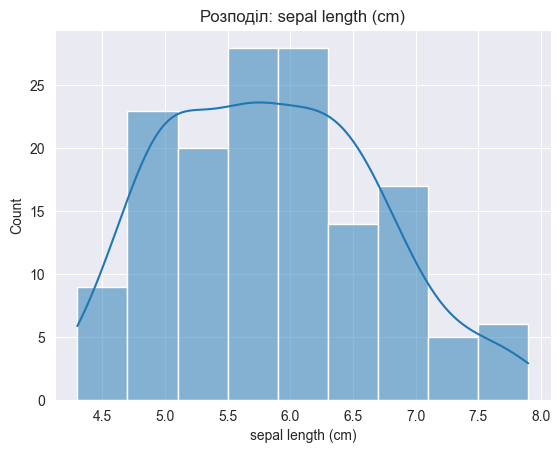

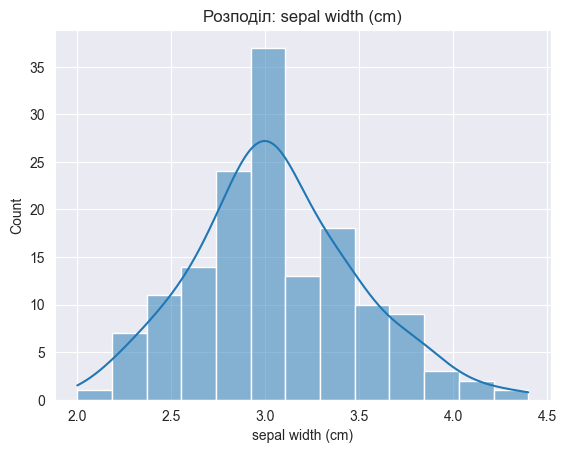

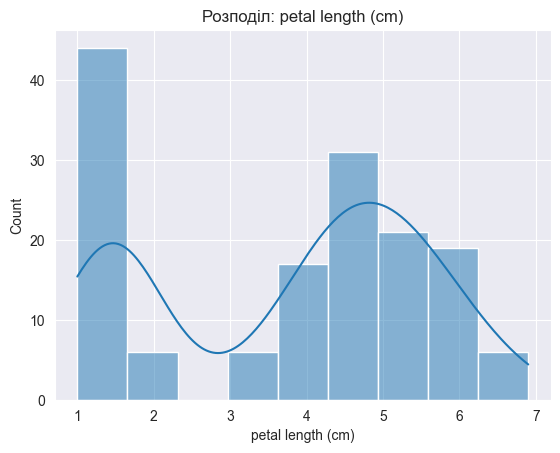

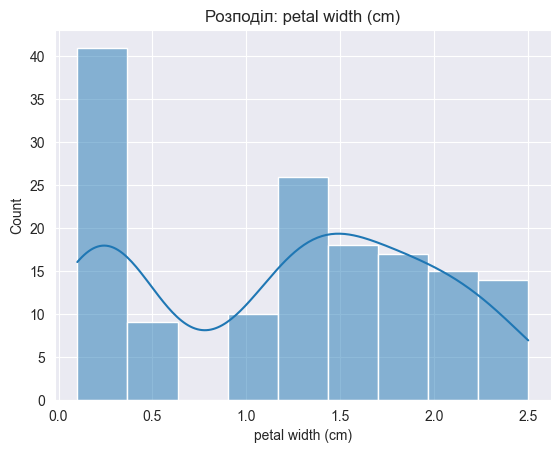

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns[:-1]:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Розподіл: {col}")
    plt.show()

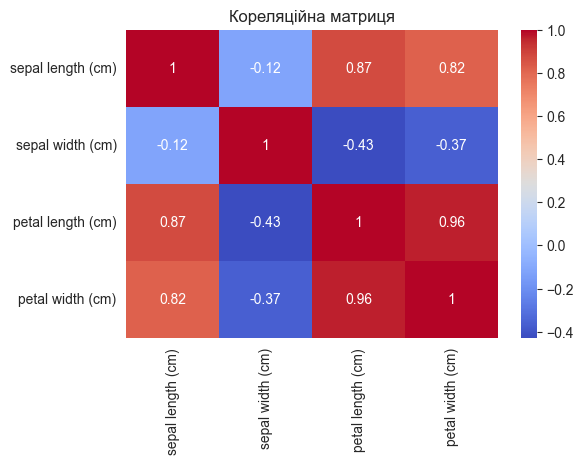

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop('target', axis=1).corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Кореляційна матриця")
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=200)
model_logreg.fit(X_train, y_train)
y_pred_logreg = model_logreg.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy логістичної регресії:", accuracy_score(y_test, y_pred_logreg))


Accuracy логістичної регресії: 1.0


In [11]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)


In [12]:
from sklearn.metrics import accuracy_score

print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))


Accuracy KNN: 1.0


In [13]:
results = {
    "Model": ["Logistic Regression", "KNN", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy
0  Logistic Regression       1.0
1                  KNN       1.0
2        Random Forest       1.0


## ✅ Висновки

Ми побудували першу модель машинного навчання — класифікатор квіток iris. Наступні кроки можуть включати роботу з іншими моделями, візуалізацію або кастомні датасети.